Project_Obesity_NS : Obesity and Age

In [15]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.stats as sts

In [16]:
# A reference to file path
report_csv_file = "Data_Sources/2019-Annual.csv"
# Read School and Student Data File and store into Pandas DataFrames
all_data_df = pd.read_csv(report_csv_file)

In [17]:
# View data_df
all_data_df.head(2)

,Edition,Report Type,Measure Name,State Name,Rank,Value,Score,Lower CI,Upper CI,Source,Source Year
0,2019,2019 Annual,Adverse Childhood Experiences,Alaska,34.0,24.1,0.96,27.7,20.5,AHR data,NaN
1,2019,2019 Annual,Adverse Childhood Experiences,Alabama,46.0,26.3,1.56,30.1,22.5,AHR data,NaN


In [18]:
# Check Data Type
all_data_df.dtypes

Edition           int64
Report Type      object
Measure Name     object
State Name       object
Rank            float64
Value           float64
Score           float64
Lower CI        float64
Upper CI        float64
Source           object
Source Year      object
dtype: object

In [19]:
# Count to check any missing data
all_data_df.count()

Edition         61509
Report Type     61509
Measure Name    61509
State Name      61509
Rank            32294
Value           49620
Score           29548
Lower CI        47727
Upper CI        47727
Source          61509
Source Year     53241
dtype: int64

In [20]:
# List Stat_name under "Measure Name"
all_list = all_data_df["Measure Name"].unique()
all_list

array(['Adverse Childhood Experiences', 'Air Pollution',
       'All Determinants', ..., 'Voter Registration - White',
       'Walk to Work', 'Water Fluoridation'], dtype=object)

In [21]:
# Create conditional
all_data_df["Measure Name"].str.contains('Obes', regex=True)

0        False
1        False
2        False
3        False
4        False
         ...  
61504    False
61505    False
61506    False
61507    False
61508    False
Name: Measure Name, Length: 61509, dtype: bool

In [22]:
# Search column with string contains "Obesity"
obesity_data_df = all_data_df.loc[all_data_df["Measure Name"].str.contains('Obesity', case=False)]
#obesity_data_df = all_data_df[all_data_df["Measure Name"].str.contains('Obesity', na=False)]
obesity_data_df.head(5)

,Edition,Report Type,Measure Name,State Name,Rank,Value,Score,Lower CI,Upper CI,Source,Source Year
45391,2019,2019 Annual,Obesity,Alabama,45.0,36.2,1.38,37.9,34.6,"CDC, Behavioral Risk Factor Surveillance System",2018
45392,2019,2019 Annual,Obesity,Alaska,15.0,29.5,-0.37,32.1,26.9,"CDC, Behavioral Risk Factor Surveillance System",2018
45393,2019,2019 Annual,Obesity,Arizona,15.0,29.5,-0.37,31.2,27.7,"CDC, Behavioral Risk Factor Surveillance System",2018
45394,2019,2019 Annual,Obesity,Arkansas,48.0,37.1,1.62,39.1,35.1,"CDC, Behavioral Risk Factor Surveillance System",2018
45395,2019,2019 Annual,Obesity,California,5.0,25.8,-1.33,26.9,24.8,"CDC, Behavioral Risk Factor Surveillance System",2018


In [23]:
obesity_data_df.count()

Edition         1144
Report Type     1144
Measure Name    1144
State Name      1144
Rank             750
Value            988
Score            750
Lower CI        1010
Upper CI        1010
Source          1144
Source Year     1144
dtype: int64

In [24]:
obesity_type = obesity_data_df["Measure Name"].unique()
obesity_type

array(['Obesity', 'Obesity - $25-$49,999', 'Obesity - $50-$74,999',
       'Obesity - $75,000 or More', 'Obesity - Ages 18-44',
       'Obesity - Ages 45-64', 'Obesity - Ages 65+',
       'Obesity - American Indian/Alaska Native', 'Obesity - Asian',
       'Obesity - Black', 'Obesity - College Grad', 'Obesity - Female',
       'Obesity - Hawaiian/Pacific Islander',
       'Obesity - High School Grad', 'Obesity - Hispanic',
       'Obesity - Less Than $25,000', 'Obesity - Less Than High School',
       'Obesity - Male', 'Obesity - Multiracial', 'Obesity - Other Race',
       'Obesity - Some College', 'Obesity - White'], dtype=object)

In [25]:
all_data_df.shape

(61509, 11)

In [26]:
# # Get list of state
all_data_df["State Name"].unique()

array(['Alaska', 'Alabama', 'United States', 'Arkansas', 'Arizona',
       'California', 'Colorado', 'Connecticut', 'District of Columbia',
       'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Iowa', 'Idaho',
       'Illinois', 'Indiana', 'Kansas', 'Kentucky', 'Louisiana',
       'Massachusetts', 'Maryland', 'Maine', 'Michigan', 'Minnesota',
       'Missouri', 'Mississippi', 'Montana', 'North Carolina',
       'North Dakota', 'Nebraska', 'New Hampshire', 'New Jersey',
       'New Mexico', 'Nevada', 'New York', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Virginia', 'Vermont', 'Washington',
       'Wisconsin', 'West Virginia', 'Wyoming'], dtype=object)

In [27]:
# Build data frame with state as index
state_df = pd.DataFrame(index=all_data_df["State Name"].unique())
state_df.head()

""
Alaska
Alabama
United States
Arkansas
Arizona


In [28]:
# Create dataset called combined_df using State_Name as Index column
def get_data(all_data_df,obesity_type,state_df):
    for category in obesity_type:
        df = all_data_df[(all_data_df["Measure Name"] == category)].loc[:,["State Name","Value"]]   
        df1 = df.groupby(["State Name"]).mean().add_suffix("-" + category)
        state_df = state_df.merge(df1,left_index=True,right_index=True)
    return state_df

combined_df = get_data(all_data_df,obesity_type,state_df)
combined_df.columns = combined_df.columns.str.replace('^Value-Obesity - ',"")

# Replace all NaN values with 0, Remove State_Name = "United States" from dataset, Rename column Obesity
combined_df = combined_df.drop(["United States"], axis=0)
combined_df = combined_df.fillna(0)
combined_df.rename(columns={"Value-Obesity":"Obesity"},inplace=True)
combined_df.head(2)                         

,Obesity,"$25-$49,999","$50-$74,999","$75,000 or More",Ages 18-44,Ages 45-64,Ages 65+,American Indian/Alaska Native,Asian,Black,...,Hawaiian/Pacific Islander,High School Grad,Hispanic,"Less Than $25,000",Less Than High School,Male,Multiracial,Other Race,Some College,White
Alaska,29.5,32.8,26.3,31.6,27.5,33.8,27.2,29.1,0.0,0.0,...,0.0,33.7,26.9,31.2,34.1,29.9,32.7,0.0,32.0,29.2
Alabama,36.2,39.3,41.1,33.4,34.3,41.8,31.8,25.4,0.0,43.8,...,0.0,39.5,30.8,43.1,42.5,34.6,37.2,0.0,41.7,34.2


In [29]:
combined_df.shape

(51, 22)

In [30]:
# Create combined2_df DataFrame using default index (Total number of States = 52)
combined2_df = combined_df.reset_index()
combined2_df.rename(columns={"index":"State Name"},inplace=True)
combined2_df.head(2)

,State Name,Obesity,"$25-$49,999","$50-$74,999","$75,000 or More",Ages 18-44,Ages 45-64,Ages 65+,American Indian/Alaska Native,Asian,...,Hawaiian/Pacific Islander,High School Grad,Hispanic,"Less Than $25,000",Less Than High School,Male,Multiracial,Other Race,Some College,White
0,Alaska,29.5,32.8,26.3,31.6,27.5,33.8,27.2,29.1,0.0,...,0.0,33.7,26.9,31.2,34.1,29.9,32.7,0.0,32.0,29.2
1,Alabama,36.2,39.3,41.1,33.4,34.3,41.8,31.8,25.4,0.0,...,0.0,39.5,30.8,43.1,42.5,34.6,37.2,0.0,41.7,34.2


In [31]:
# Save file to .csv
combined_df.to_csv(r'Data_Sources\age51_obesity.csv')

In [32]:
# Clean datastates and print cleand_data out to .csv for analysis
# Drop rows (states) : "District of Columbia"

scope_df = combined_df.drop(["District of Columbia"], axis=0)

# Replace all NaN values with 0 
scope_df = scope_df.fillna(0)
scope_df.shape

(50, 22)

In [33]:
scope_df.head(2)

,Obesity,"$25-$49,999","$50-$74,999","$75,000 or More",Ages 18-44,Ages 45-64,Ages 65+,American Indian/Alaska Native,Asian,Black,...,Hawaiian/Pacific Islander,High School Grad,Hispanic,"Less Than $25,000",Less Than High School,Male,Multiracial,Other Race,Some College,White
Alaska,29.5,32.8,26.3,31.6,27.5,33.8,27.2,29.1,0.0,0.0,...,0.0,33.7,26.9,31.2,34.1,29.9,32.7,0.0,32.0,29.2
Alabama,36.2,39.3,41.1,33.4,34.3,41.8,31.8,25.4,0.0,43.8,...,0.0,39.5,30.8,43.1,42.5,34.6,37.2,0.0,41.7,34.2


In [34]:
# Scope2_df.rename(columns={"index":"State Name"},inplace=True)
scope2_df = combined_df.reset_index()
scope2_df.rename(columns={"index":"State Name"},inplace=True)
scope2_df.head(2)

,State Name,Obesity,"$25-$49,999","$50-$74,999","$75,000 or More",Ages 18-44,Ages 45-64,Ages 65+,American Indian/Alaska Native,Asian,...,Hawaiian/Pacific Islander,High School Grad,Hispanic,"Less Than $25,000",Less Than High School,Male,Multiracial,Other Race,Some College,White
0,Alaska,29.5,32.8,26.3,31.6,27.5,33.8,27.2,29.1,0.0,...,0.0,33.7,26.9,31.2,34.1,29.9,32.7,0.0,32.0,29.2
1,Alabama,36.2,39.3,41.1,33.4,34.3,41.8,31.8,25.4,0.0,...,0.0,39.5,30.8,43.1,42.5,34.6,37.2,0.0,41.7,34.2


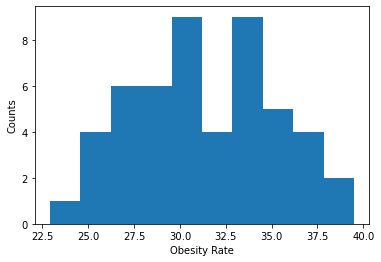

Mean value is 31.426
Median value is 30.9
Mode is ModeResult(mode=array([29.5]), count=array([3]))
Variance using Numpy module is 14.358724000000002
Standard deviation using Numpy module is 3.7892906987983914
NormaltestResult(statistic=0.664347823246355, pvalue=0.7173625543191802)
z-scores values are [-0.50827454  1.25986639  1.49737786 -0.50827454 -1.48471058 -2.25002532
 -1.06246797  0.54733199 -0.19159258  0.28343035 -1.72222205  1.02235492
 -0.79856634  0.09869921  0.70567296  0.78484345  1.36542704  1.41820737
 -1.51110075 -0.13881226 -0.27076307  0.41538117 -0.34993356  0.94318443
  2.13074178 -1.19441879  0.41538117  0.9695746   0.70567296 -0.48188438
 -1.53749091  0.23065003 -0.50827454 -1.00968764  0.6792828   0.89040411
 -0.40271389 -0.13881226 -0.98329748  0.75845329 -0.34993356  0.78484345
  0.89040411 -0.98329748 -0.29715324 -1.03607781 -0.71939585  0.15147954
  2.13074178 -0.64022536]


In [35]:
# Determine which measure of central tendency is most appropriate to describe the dataset
# Dataset scope_df contains 50 states in the USA
obesity_value = scope_df["Obesity"]
plt.hist(scope_df['Obesity'])
plt.xlabel('Obesity Rate')
plt.ylabel('Counts')
plt.show()

mean_numpy = np.mean(obesity_value)
median_numpy = np.median(obesity_value)
mode_scipy = sts.mode(obesity_value)
var_numpy = np.var(obesity_value,ddof=0)
sd_numpy = np.std(obesity_value,ddof=0)
z_scipy = sts.zscore(obesity_value)

print(f"Mean value is {mean_numpy}")
print(f"Median value is {median_numpy}")
print(f"Mode is {mode_scipy}")
print(f"Variance using Numpy module is {var_numpy}")
print(f"Standard deviation using Numpy module is {sd_numpy}")

# Hypothesis testing using P-value
# The result is higher or equal than 0.5 meaning our hypothesis is True
print(sts.normaltest(obesity_value.sample(50)))

print(f"z-scores values are {z_scipy}")

The result is prove the hypothesis is true (pvalue=0.7173625543191802)

Results:
Mean value is 31.426
Median value is 30
Mode is ModeResult(mode=array([29.5]), count=array([3]))
Variance using Numpy module is 14.358724
Standard deviation using Numpy module is 3.7892906987983914
NormaltestResult(statistic=0.6643478232463549, pvalue=0.7173625543191802)
z-scores values are [-0.50827454  1.25986639  1.49737786 -0.50827454 -1.48471058 -2.25002532
 -1.06246797  0.54733199 -0.19159258  0.28343035 -1.72222205  1.02235492
 -0.79856634  0.09869921  0.70567296  0.78484345  1.36542704  1.41820737
 -1.51110075 -0.13881226 -0.27076307  0.41538117 -0.34993356  0.94318443
  2.13074178 -1.19441879  0.41538117  0.9695746   0.70567296 -0.48188438
 -1.53749091  0.23065003 -0.50827454 -1.00968764  0.6792828   0.89040411
 -0.40271389 -0.13881226 -0.98329748  0.75845329 -0.34993356  0.78484345
  0.89040411 -0.98329748 -0.29715324 -1.03607781 -0.71939585  0.15147954
  2.13074178 -0.64022536]


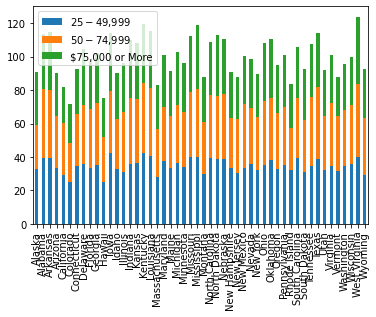

In [36]:
# Plot stack bar hightlight the income range to Obesity rates per state
axis = scope_df[['$25-$49,999','$50-$74,999','$75,000 or More']].plot(kind="bar", stacked=True)
fig = axis.get_figure()

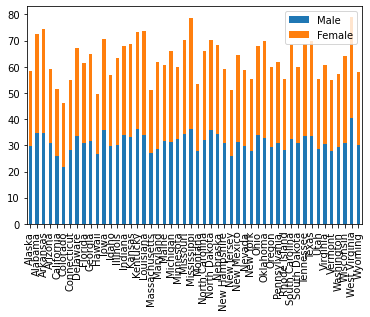

In [37]:
# Plot stack bar between Genders(Male vs Female) per state
axis = scope_df[['Male','Female']].plot(kind="bar", stacked=True)
fig = axis.get_figure()

In [46]:
scope_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alaska to Wyoming
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Obesity                        50 non-null     float64
 1   $25-$49,999                    50 non-null     float64
 2   $50-$74,999                    50 non-null     float64
 3   $75,000 or More                50 non-null     float64
 4   Ages 18-44                     50 non-null     float64
 5   Ages 45-64                     50 non-null     float64
 6   Ages 65+                       50 non-null     float64
 7   American Indian/Alaska Native  50 non-null     float64
 8   Asian                          50 non-null     float64
 9   Black                          50 non-null     float64
 10  College Grad                   50 non-null     float64
 11  Female                         50 non-null     float64
 12  Hawaiian/Pacific Islander      50 non-null     

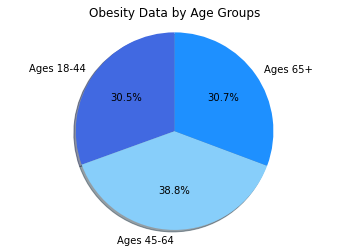

In [39]:
# Group our data based on age groups on pie chart
group1 = scope_df["Ages 18-44"].mean()
group2 = scope_df["Ages 45-64"].mean()
group3 = scope_df["Ages 65+"].mean()
age_avg = [group1, group2,group3]
age = ["Ages 18-44","Ages 45-64","Ages 65+"]
colors = ["royalblue", "lightskyblue","dodgerblue"]
explode = (0,0,0)
plt.title("Obesity Data by Age Groups")
plt.pie(age_avg, explode=explode, labels=age, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()

The correlation between 45-64 years to obesity rate is 0.96


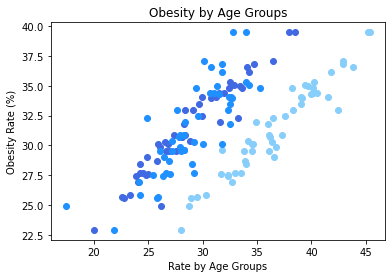

In [40]:
# Scatter and calculate Correlation plots based on age group
young_age = scope_df["Ages 18-44"]
mid_age = scope_df["Ages 45-64"]
elder_age = scope_df["Ages 65+"]
obesity_avg = scope_df["Obesity"]
correlation = sts.pearsonr(mid_age,obesity_avg)
plt.scatter(young_age,obesity_avg, c="royalblue")
plt.scatter(mid_age,obesity_avg,c="lightskyblue")
plt.scatter(elder_age,obesity_avg,c="dodgerblue")
plt.title("Obesity by Age Groups")
plt.xlabel("Rate by Age Groups")
plt.ylabel("Obesity Rate (%)")
print(f"The correlation between 45-64 years to obesity rate is {round(correlation[0],2)}")
plt.show()

The correlation between both factors is 0.96. This is indicating almost perfect positive correlation.

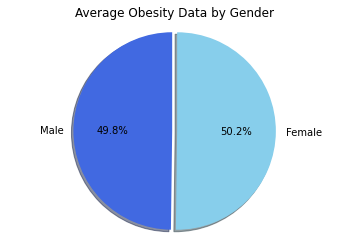

In [41]:
# Group our data based on gender 'Male' and 'Female' on pie chart
male_group = scope_df["Male"].mean()
female_group = scope_df["Female"].mean()
gender_avg = [male_group, female_group]
gender = ["Male","Female"]
colors = ["royalblue", "skyblue"]
explode = (0, 0.05)
plt.title("Average Obesity Data by Gender")
plt.pie(gender_avg, explode=explode, labels=gender, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()

The correlation between Male to Obesity Rate is 0.94


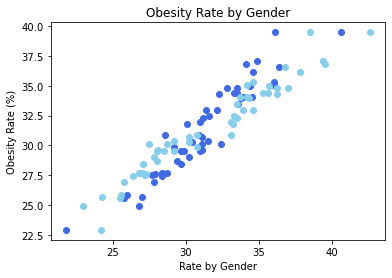

In [42]:
# Scatter and calculate Correlation plots based on age group
male = scope_df["Male"]
female = scope_df["Female"]
obesity_avg = scope_df["Obesity"]
correlation = sts.pearsonr(male,obesity_avg)
plt.scatter(male,obesity_avg, c="royalblue")
plt.scatter(female,obesity_avg, c="skyblue")
plt.title("Obesity Rate by Gender")
plt.xlabel("Rate by Gender")
plt.ylabel("Obesity Rate (%)")
print(f"The correlation between Male to Obesity Rate is {round(correlation[0],2)}")
plt.show()

Text(0, 0.5, 'Obesity Rate (%)')

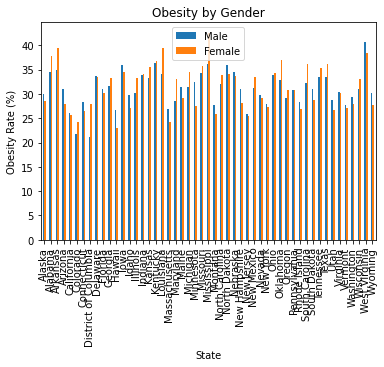

In [43]:
# Plot bar chart comparing (Male vs Female)
scope2_df.plot(x='State Name', y=['Male','Female'], kind='bar' )
plt.title("Obesity by Gender")
plt.xlabel('State')
plt.ylabel('Obesity Rate (%)')

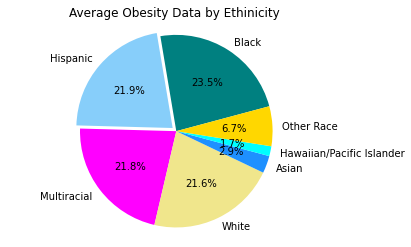

In [44]:
# Plot data based on race
black_gr = scope_df["Black"].mean()
hispanic_gr = scope_df["Hispanic"].mean()
multi_gr = scope_df["Multiracial"].mean()
white_gr = scope_df["White"].mean()
asian_gr = scope_df["Asian"].mean()
hawai_gr = scope_df["Hawaiian/Pacific Islander"].mean()
other_gr = scope_df["Other Race"].mean()

ethinicity_avg = [black_gr, hispanic_gr, multi_gr, white_gr, asian_gr, hawai_gr, other_gr]
ethinic = ["Black","Hispanic","Multiracial","White", "Asian","Hawaiian/Pacific Islander","Other Race"]
colors = ["teal", "lightskyblue", "magenta", "khaki", "dodgerblue", "cyan","gold"]
explode = (0, 0.05,0,0,0,0,0)
plt.title("Average Obesity Data by Ethinicity")
plt.pie(ethinicity_avg, explode=explode, labels=ethinic, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=15)
plt.axis("equal")
plt.show()

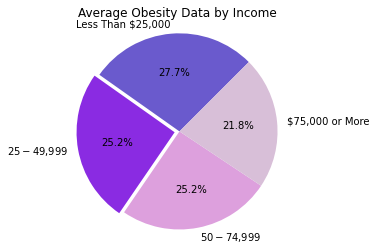

In [45]:
# Plot data based upon income on pie chart
lowest = scope_df["Less Than $25,000"].mean()
second_lowest = scope_df["$25-$49,999"].mean()
mid = scope_df["$50-$74,999"].mean()
high = scope_df["$75,000 or More"].mean()

income_avg = [lowest, second_lowest, mid, high]
income = ["Less Than $25,000","$25-$49,999","$50-$74,999","$75,000 or More"]
colors = ["slateblue", "blueviolet", "plum", "thistle"]
explode = (0, 0.05,0,0)
plt.title("Average Obesity Data by Income")
plt.pie(income_avg, explode=explode, labels=income, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=45)
plt.axis("equal")
plt.show()